<a href="https://colab.research.google.com/github/StudentHagal/Thesis/blob/main/Copy_of_Dataset_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Preparation

## Load Requirements

In [1]:
# Github Repo
!git clone https://github.com/StudentHagal/Thesis.git

# Libraries
import sys
import pandas as pd
import hashlib
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import scipy
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

#Extension
!pip install ipython-autotime
%load_ext autotime

print('Load completed')


Cloning into 'Thesis'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 44 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Load completed
time: 1.8 ms (started: 2021-10-07 14:11:14 +00:00)


## Check Lib version

In [ ]:
# Check the versions of libraries
# !!! WARNING !!!
# Important because model result may be different for other version
 
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('joblib: {}'.format(joblib.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1
joblib: 1.0.1
time: 7.54 ms (started: 2021-10-07 12:00:06 +00:00)


## Global Variables declaration

In [ ]:
# Global Variable

#known hash value of file
compare = '10f68054068bc4ac4d7fee65e8fd7a184151e3ce3abce5d85350fc13c412d93b'    
#Stored file path                     
raw_file = "/content/drive/MyDrive/Colab Notebooks/ML Resources/Raw Data/Format csv/database.csv"
#environment path
code_dir = '/content/drive/MyDrive/Colab Notebooks/Thesis Repo/'           
model_dir = '/content/drive/MyDrive/Colab Notebooks/ML Resources/models/'                                  
process_dir = '/content/drive/MyDrive/Colab Notebooks/ML Resources/Processed Data/'
#Column names for dataset
col_names = ['No', 'Datetime', 'Control_Mode', 'L1', 'L2', 'L3', 'Frequency', 'kVA_Total',           
             'kVA_L1', 'kVA_L2', 'kVA_L3', 'KVAr', 'Oil_Pressure', 'Coolant_Temp', 
             'Charger_Alternator', 'PF_Avg', 'PF_L1', 'PF_L2', 
             'PF_L3', 'L1_N', 'L2_N', 'L3_N', 'Source_Ext_Voltage', 'ECU_Temp', 
             'RPM', 'Train_code']
features = ['Oil_Pressure', 'Coolant_Temp', 'PF_Avg', 'ECU_Temp']
df = pd.read_csv(raw_file, names=col_names)
#Unused columns in dataset
unused_col = ['No', 'Control_Mode', 'L1', 'L2', 'L3', 'Frequency',                              
              'kVA_Total', 'kVA_L1', 'kVA_L2', 'kVA_L3', 'KVAr', 'Charger_Alternator',
              'RPM', 'PF_L1', 'PF_L2', 'PF_L3', 'L1_N','L2_N', 'L3_N',
              'Source_Ext_Voltage']

results = []
names = []
array_predict = []

# Algorithm considered
model_LinearReg = LinearRegression()
model_BayesRidge = linear_model.BayesianRidge()
model_SVR = SVR()
models = []
models.append(('LinearReg', model_LinearReg))
models.append(('BR', model_BayesRidge))
models.append(('SVR', model_SVR))

#Threshold value variable 40% min, 60% max
oil_threshold_40, oil_threshold_60 = df.Oil_Pressure.quantile([0.4 , 0.6])
coolant_threshold_40, coolant_threshold_60 = df.Coolant_Temp.quantile([0.4 , 0.6])
pf_threshold_40, pf_threshold_60 = df.PF_Avg.quantile([0.4 , 0.6])
ecu_threshold_40, ecu_threshold_60 = df.ECU_Temp.quantile([0.4 , 0.6])
#Threshold value variable 25% min, 75% max
oil_threshold_25, oil_threshold_75 = df.Oil_Pressure.quantile([0.25 , 0.75])
coolant_threshold_25, coolant_threshold_75 = df.Coolant_Temp.quantile([0.25 , 0.75])
pf_threshold_25, pf_threshold_75 = df.PF_Avg.quantile([0.25 , 0.75])
ecu_threshold_25, ecu_threshold_75 = df.ECU_Temp.quantile([0.25 , 0.75])

time: 185 ms (started: 2021-10-07 12:00:06 +00:00)


## Hash Check Function

In [ ]:
# Function that returns the SHA-2 hash of the file
def hash_file(filename):

   # make a hash object with SHA-2
   h = hashlib.sha256()

   # open file for reading in binary mode
   with open('/content/drive/MyDrive/Colab Notebooks/ML Resources/Raw Data/Format csv/database.csv','rb') as file:
       # loop till the end of the file
       chunk = 0
       while chunk != b'':
           # read only 1024 bytes at a time
           chunk = file.read(1024)
           h.update(chunk)

   # return the hex representation of digest
   return h.hexdigest()


time: 11 ms (started: 2021-10-07 12:00:06 +00:00)


# 1) Processing Dataset

### Hash Validation

In [ ]:
# Checking hash value of a file
compare = '10f68054068bc4ac4d7fee65e8fd7a184151e3ce3abce5d85350fc13c412d93b'
message = hash_file('database.csv')
print('SHA-256 value of your file is :')
print(message)

if (compare == message) :
  print('Hash check SUCCESS')
else :
  print('Hash check INVALID')

SHA-256 value of your file is :
10f68054068bc4ac4d7fee65e8fd7a184151e3ce3abce5d85350fc13c412d93b
Hash check SUCCESS
time: 28 ms (started: 2021-10-07 12:00:06 +00:00)


## Feature Selection

In [ ]:
# Summarize raw dataset
pd.set_option('display.max_columns', None)
# size of (row, column) data
print('Total data size : ', df.shape)
# show sample entry of data
df.head(5)

Total data size :  (34357, 26)


,No,Datetime,Control_Mode,L1,L2,L3,Frequency,kVA_Total,kVA_L1,kVA_L2,kVA_L3,KVAr,Oil_Pressure,Coolant_Temp,Charger_Alternator,PF_Avg,PF_L1,PF_L2,PF_L3,L1_N,L2_N,L3_N,Source_Ext_Voltage,ECU_Temp,RPM,Train_code
0,1.1,01-08-20 02:03,2.0,28.0,27.0,26.0,50.0,18.51,6.35,6.09,5.89,0.00,636.0,81.0,26.9,0.83,0.83,0.82,0.84,220.8,221.1,220.8,25.98,32767.0,1499.0,MP3-01605
1,1.2,01-08-20 03:00,2.0,39.0,39.0,37.0,50.0,25.74,8.65,8.45,8.24,0.00,636.0,81.0,26.9,0.76,0.77,0.75,0.77,220.8,220.5,220.8,25.84,32767.0,1501.0,MP3-01605
2,1.3,01-08-20 04:00,2.0,104.0,100.0,100.0,50.0,68.59,22.89,22.32,22.02,46.74,632.0,82.0,26.9,0.77,0.77,0.76,0.77,220.2,220.7,220.5,25.93,32767.0,1499.0,MP3-01605
3,1.4,01-08-20 05:00,2.0,90.0,87.0,87.0,50.0,59.36,19.81,19.30,19.15,39.78,632.0,82.0,26.9,0.78,0.78,0.77,0.78,220.5,220.5,220.8,26.18,32767.0,1500.0,MP3-01605
4,1.5,01-08-20 06:00,2.0,98.0,96.0,96.0,50.0,64.60,21.66,21.14,21.14,43.31,628.0,82.0,27.0,0.78,0.77,0.78,0.78,220.3,220.4,220.6,26.14,32767.0,1500.0,MP3-01605


time: 56 ms (started: 2021-10-07 12:00:06 +00:00)


In [ ]:
# statistical value of data
df.describe()


,No,Control_Mode,L1,L2,L3,Frequency,kVA_Total,kVA_L1,kVA_L2,kVA_L3,KVAr,Oil_Pressure,Coolant_Temp,Charger_Alternator,PF_Avg,PF_L1,PF_L2,PF_L3,L1_N,L2_N,L3_N,Source_Ext_Voltage,ECU_Temp,RPM
count,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,3.383200e+04,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000
mean,16.382906,1.531893,104.661208,103.481822,103.836072,41.849285,69.517004,23.098147,22.853998,22.919337,2.567771e+04,1533.996364,663.118379,23.126040,5.953150,5.577243,5.935014,6.347120,186.349900,186.401478,186.174010,23.340322,6278.678647,1345.971831
std,9.070813,0.810421,79.092619,78.685596,78.725843,18.329195,52.483808,17.573883,17.497579,17.482340,3.308827e+05,8092.570600,4389.881127,10.263944,40.234364,39.608321,41.013527,42.585116,80.731685,80.867993,80.890586,9.010295,12862.110888,2602.133855
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.200000,1.000000,39.000000,38.000000,38.000000,50.000000,26.037500,8.440000,8.280000,8.260000,9.680000e+00,592.000000,76.000000,27.100000,0.780000,0.780000,0.780000,0.780000,219.600000,219.700000,219.675000,26.330000,36.000000,1499.000000
50%,16.900000,2.000000,104.000000,103.000000,103.000000,50.000000,69.020000,22.985000,22.725000,22.940000,3.354000e+01,612.000000,81.000000,27.700000,0.870000,0.870000,0.860000,0.860000,221.100000,221.300000,221.100000,27.110000,41.000000,1499.000000
75%,24.360000,2.000000,159.000000,157.000000,157.000000,50.000000,105.420000,35.160000,34.700000,34.680000,5.388000e+01,624.000000,82.000000,27.900000,0.890000,0.890000,0.890000,0.880000,222.200000,222.400000,222.300000,27.300000,48.000000,1500.000000
max,31.990000,5.000000,555.000000,562.000000,557.000000,51.900000,376.510000,125.340000,127.240000,125.700000,4.294967e+06,65535.000000,65531.000000,29.900000,327.650000,327.650000,327.650000,327.650000,227.800000,227.900000,229.100000,30.720000,32767.000000,65531.000000


time: 124 ms (started: 2021-10-07 12:00:06 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34357 entries, 0 to 34356
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  33832 non-null  float64
 1   Datetime            33832 non-null  object 
 2   Control_Mode        33832 non-null  float64
 3   L1                  33832 non-null  float64
 4   L2                  33832 non-null  float64
 5   L3                  33832 non-null  float64
 6   Frequency           33832 non-null  float64
 7   kVA_Total           33832 non-null  float64
 8   kVA_L1              33832 non-null  float64
 9   kVA_L2              33832 non-null  float64
 10  kVA_L3              33832 non-null  float64
 11  KVAr                33832 non-null  float64
 12  Oil_Pressure        33832 non-null  float64
 13  Coolant_Temp        33832 non-null  float64
 14  Charger_Alternator  33832 non-null  float64
 15  PF_Avg              33832 non-null  float64
 16  PF_L

In [ ]:
# class distribution
df.groupby('Train_code').size()

Train_code
MP3-01605    1434
MP3-01606     983
P-01601       423
P-01801      1922
P-01808      3068
P-01810      2570
P-01811      2258
P-01812      1231
P-01818      2280
P-01820      2186
P-01821      2006
P-01822      2901
P-01823       867
P-01825      1396
P-01903      2128
P-01908      3187
P-01914      2992
dtype: int64

time: 12.2 ms (started: 2021-10-07 12:00:07 +00:00)


In [ ]:
# convert Datetime Dtype
df['Datetime'] = pd.to_datetime(df.Datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34357 entries, 0 to 34356
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  33832 non-null  float64       
 1   Datetime            33832 non-null  datetime64[ns]
 2   Control_Mode        33832 non-null  float64       
 3   L1                  33832 non-null  float64       
 4   L2                  33832 non-null  float64       
 5   L3                  33832 non-null  float64       
 6   Frequency           33832 non-null  float64       
 7   kVA_Total           33832 non-null  float64       
 8   kVA_L1              33832 non-null  float64       
 9   kVA_L2              33832 non-null  float64       
 10  kVA_L3              33832 non-null  float64       
 11  KVAr                33832 non-null  float64       
 12  Oil_Pressure        33832 non-null  float64       
 13  Coolant_Temp        33832 non-null  float64   

In [ ]:
# Feature selection
# delete columns with condition
df.drop(labels=unused_col, axis=1, inplace=True)
df

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Train_code
0,2020-01-08 02:03:00,636.0,81.0,0.83,32767.0,MP3-01605
1,2020-01-08 03:00:00,636.0,81.0,0.76,32767.0,MP3-01605
2,2020-01-08 04:00:00,632.0,82.0,0.77,32767.0,MP3-01605
3,2020-01-08 05:00:00,632.0,82.0,0.78,32767.0,MP3-01605
4,2020-01-08 06:00:00,628.0,82.0,0.78,32767.0,MP3-01605
...,...,...,...,...,...,...
34352,2020-12-31 13:00:00,600.0,83.0,0.88,32767.0,P-01914
34353,2020-12-31 14:00:00,604.0,82.0,0.88,32767.0,P-01914
34354,2020-12-31 15:00:00,604.0,81.0,0.87,32767.0,P-01914
34355,2020-12-31 16:00:00,0.0,0.0,0.00,0.0,P-01914


time: 26.9 ms (started: 2021-10-07 12:00:10 +00:00)


In [ ]:
# statistical value of data
df.describe()

,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp
count,33832.000000,33832.000000,33832.000000,33832.000000
mean,1533.996364,663.118379,5.953150,6278.678647
std,8092.570600,4389.881127,40.234364,12862.110888
min,0.000000,0.000000,0.000000,0.000000
25%,592.000000,76.000000,0.780000,36.000000
50%,612.000000,81.000000,0.870000,41.000000
75%,624.000000,82.000000,0.890000,48.000000
max,65535.000000,65531.000000,327.650000,32767.000000


time: 33.8 ms (started: 2021-10-07 12:00:10 +00:00)


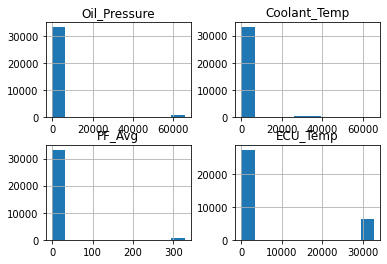

time: 632 ms (started: 2021-10-07 12:00:10 +00:00)


In [ ]:
# visualisasi dalam grafik
df.hist()
pyplot.show()

In [ ]:
#amount of Outlier data
df[(df[features] >= df.quantile(q=0.75)) | (df[features] <= df.quantile(q=0.25))].count()

Datetime            0
Oil_Pressure    17684
Coolant_Temp    21942
PF_Avg          17721
ECU_Temp        17890
Train_code          0
dtype: int64

time: 52.5 ms (started: 2021-10-07 12:00:11 +00:00)


## Data Processing

### Label data for Classification

In [ ]:
#Print quantile value for label threshold

print('Threshold values (40%, 60%) :')
print('Oil_Pressure  = ', [oil_threshold_40, oil_threshold_60])
print('Coolant_Temp  = ', [coolant_threshold_40, coolant_threshold_60])
print('PF_Avg        = ', [pf_threshold_40, pf_threshold_60])
print('ECU_Temp      = ', [ecu_threshold_40, ecu_threshold_60])
print('')
print('Threshold values (25%, 75%) :')
print('Oil_Pressure  = ', [oil_threshold_25, oil_threshold_75])
print('Coolant_Temp  = ', [coolant_threshold_25, coolant_threshold_75])
print('PF_Avg        = ', [pf_threshold_25, pf_threshold_75])
print('ECU_Temp      = ', [ecu_threshold_25, ecu_threshold_75])

Threshold values (40%, 60%) :
Oil_Pressure  =  [608.0, 616.0]
Coolant_Temp  =  [79.0, 81.0]
PF_Avg        =  [0.8500000000000001, 0.8700000000000001]
ECU_Temp      =  [39.0, 43.0]

Threshold values (25%, 75%) :
Oil_Pressure  =  [592.0, 624.0]
Coolant_Temp  =  [76.0, 82.0]
PF_Avg        =  [0.78, 0.89]
ECU_Temp      =  [36.0, 48.0]
time: 8.64 ms (started: 2021-10-07 12:00:11 +00:00)


In [ ]:
#Stat_Outlier = value <= 25% or value >= 75%
Outlier_Oil = (df['Oil_Pressure'] <= oil_threshold_25) | (df['Oil_Pressure'] >= oil_threshold_75)
Outlier_Coolant =(df['Coolant_Temp'] <= coolant_threshold_25) | (df['Coolant_Temp'] >= coolant_threshold_75) 
Outlier_ECU = (df['ECU_Temp'] <= ecu_threshold_25) | (df['ECU_Temp'] >= ecu_threshold_75) 
Outlier_PFA = (df['PF_Avg'] <= pf_threshold_25) | (df['PF_Avg'] >= pf_threshold_75)

#All parameter have Stat_Outlier condition TRUE then it is labelled as Outlier
df_Outlier = df[Outlier_Oil & Outlier_Coolant & Outlier_ECU & Outlier_PFA]
df_Outlier.insert(5, 'Label', 'Outlier', True)
print('Outlier data')
print(df_Outlier.head(5))
print('Outlier data size : ', df_Outlier.shape)
print(' ')

Outlier data
              Datetime  Oil_Pressure  Coolant_Temp  PF_Avg  ECU_Temp    Label  \
2  2020-01-08 04:00:00         632.0          82.0    0.77   32767.0  Outlier   
3  2020-01-08 05:00:00         632.0          82.0    0.78   32767.0  Outlier   
4  2020-01-08 06:00:00         628.0          82.0    0.78   32767.0  Outlier   
23 2020-01-09 08:00:00           0.0           0.0    0.00       0.0  Outlier   
39 2020-01-12 00:00:00           0.0           0.0    0.00       0.0  Outlier   

   Train_code  
2   MP3-01605  
3   MP3-01605  
4   MP3-01605  
23  MP3-01605  
39  MP3-01605  
Outlier data size :  (7569, 7)
 
time: 33.5 ms (started: 2021-10-07 12:00:11 +00:00)


In [ ]:
#Stat_Normal = 40% <= value <= 60%
Normal_Oil = df['Oil_Pressure'].between(oil_threshold_40, oil_threshold_60) 
Normal_Coolant = df['Coolant_Temp'].between(coolant_threshold_40, coolant_threshold_60)
Normal_ECU = df['ECU_Temp'].between(ecu_threshold_40, ecu_threshold_60) 
Normal_PFA = df['PF_Avg'].between(pf_threshold_40, pf_threshold_60)

#When any parameter have all Stat_Normal condition TRUE then it is labelled as Normal
df_Normal = df[Normal_Oil & Normal_Coolant & Normal_ECU & Normal_PFA]
df_Normal.insert(5, 'Label', 'Normal', True)
print('Normal data')
print(df_Normal.head(5))
print('Normal data size : ', df_Normal.shape)
print(' ')

Normal data
                Datetime  Oil_Pressure  Coolant_Temp  PF_Avg  ECU_Temp  \
5339 2020-04-12 20:00:00         616.0          81.0    0.87      42.0   
5645 2020-07-09 01:00:00         616.0          81.0    0.87      39.0   
5822 2021-08-02 01:00:00         616.0          81.0    0.86      41.0   
5913 2020-09-10 00:00:00         616.0          81.0    0.87      39.0   
6109 2021-10-02 23:00:00         616.0          81.0    0.87      39.0   

       Label Train_code  
5339  Normal    P-01808  
5645  Normal    P-01808  
5822  Normal    P-01808  
5913  Normal    P-01808  
6109  Normal    P-01808  
Normal data size :  (372, 7)
 
time: 26.3 ms (started: 2021-10-07 12:00:11 +00:00)


In [ ]:
#Stat_Maintenance = 25% < value < 40% or 60% < value < 75%
Maintenance_Oil = (df['Oil_Pressure'].between(oil_threshold_25, oil_threshold_40, inclusive=False)) | (df['Oil_Pressure'].between(oil_threshold_60, oil_threshold_75, inclusive=False))
Maintenance_Coolant = (df['Coolant_Temp'].between(coolant_threshold_25, coolant_threshold_40, inclusive=False)) | (df['Coolant_Temp'].between(coolant_threshold_60, coolant_threshold_75, inclusive=False)) 
Maintenance_ECU = (df['ECU_Temp'].between(ecu_threshold_25, ecu_threshold_40, inclusive=False)) | (df['ECU_Temp'].between(ecu_threshold_60, ecu_threshold_75, inclusive=False))
Maintenance_PFA = (df['PF_Avg'].between(pf_threshold_25, pf_threshold_40, inclusive=False)) | (df['PF_Avg'].between(pf_threshold_60, pf_threshold_75, inclusive=False))

#When any feature have Stat_Maintenance condition TRUE then it is labelled as Maintenance
df_Maintenance = df[Maintenance_Oil & Maintenance_Coolant & Maintenance_ECU & Maintenance_PFA]
df_Maintenance.insert(5, 'Label', 'Maintenance', True)
print('Maintenance data')
print(df_Maintenance.head(5))
print('Maintenance data size : ', df_Maintenance.shape)
print(' ')

Maintenance data
                 Datetime  Oil_Pressure  Coolant_Temp  PF_Avg  ECU_Temp  \
12889 2020-01-10 22:00:00         620.0          78.0    0.79      44.0   
13010 2020-03-10 18:00:00         604.0          78.0    0.81      46.0   
13011 2020-03-10 19:00:00         604.0          78.0    0.80      44.0   
13287 2020-04-16 10:00:00         620.0          77.0    0.79      38.0   
13309 2020-03-18 20:00:00         600.0          77.0    0.88      38.0   

             Label Train_code  
12889  Maintenance    P-01812  
13010  Maintenance    P-01812  
13011  Maintenance    P-01812  
13287  Maintenance    P-01812  
13309  Maintenance    P-01812  
Maintenance data size :  (56, 7)
 
time: 35.7 ms (started: 2021-10-07 12:00:11 +00:00)


In [ ]:
#Separate unlabelled data then export
df_Unlabelled = pd.concat([df, df_Outlier, df_Outlier,
                           df_Normal, df_Normal, 
                           df_Maintenance, df_Maintenance]).drop_duplicates(keep=False)
df_Unlabelled.drop('Label',axis=1, inplace=True)
print('Unlabelled data')
print(df_Unlabelled.head(5))
print('Unlabelled data size : ', df_Unlabelled.shape)
df_Unlabelled.to_csv(process_dir+'unlabelled.csv')

Unlabelled data
             Datetime  Oil_Pressure  Coolant_Temp  PF_Avg  ECU_Temp Train_code
0 2020-01-08 02:03:00         636.0          81.0    0.83   32767.0  MP3-01605
1 2020-01-08 03:00:00         636.0          81.0    0.76   32767.0  MP3-01605
2 2020-01-08 04:00:00         632.0          82.0    0.77   32767.0  MP3-01605
3 2020-01-08 05:00:00         632.0          82.0    0.78   32767.0  MP3-01605
4 2020-01-08 06:00:00         628.0          82.0    0.78   32767.0  MP3-01605
Unlabelled data size :  (33832, 6)
time: 311 ms (started: 2021-10-07 12:00:11 +00:00)


                Datetime  Oil_Pressure  Coolant_Temp  PF_Avg  ECU_Temp  \
0    2020-01-10 22:00:00         620.0          78.0    0.79      44.0   
1    2020-03-10 18:00:00         604.0          78.0    0.81      46.0   
2    2020-03-10 19:00:00         604.0          78.0    0.80      44.0   
3    2020-04-16 10:00:00         620.0          77.0    0.79      38.0   
4    2020-03-18 20:00:00         600.0          77.0    0.88      38.0   
...                  ...           ...           ...     ...       ...   
7992 2020-08-25 22:00:00         608.0          80.0    0.87      41.0   
7993 2020-07-26 04:00:00         608.0          80.0    0.86      39.0   
7994 2020-08-26 03:00:00         608.0          80.0    0.86      40.0   
7995 2020-08-28 04:00:00         608.0          79.0    0.87      39.0   
7996 2020-07-31 21:00:00         608.0          81.0    0.87      39.0   

            Label Train_code  
0     Maintenance    P-01812  
1     Maintenance    P-01812  
2     Maintenance 

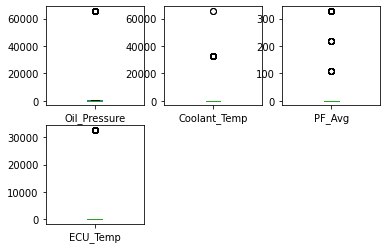

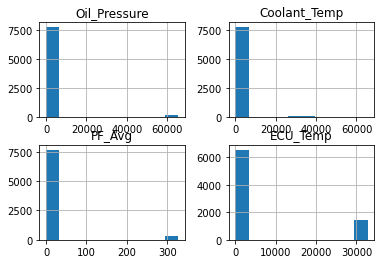

time: 1.2 s (started: 2021-10-07 12:00:11 +00:00)


In [ ]:
#Training dataset 1 summary (include outlier)

#merge labelled data into training dataset
combine = pd.merge(df_Maintenance, df_Outlier, how = 'outer')
labeled_dataset1 = pd.merge(combine, df_Normal, how = 'outer')
print(labeled_dataset1)

#Visualize data
print('Training dataset size with outlier : ', labeled_dataset1.shape)
# class distribution
print(labeled_dataset1.groupby('Label').size())
print(' ')
# statistical value of data
print(labeled_dataset1.describe(percentiles=[.25, .4, .5, .6, .75]))
# box and whisker plots
labeled_dataset1.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()
# histograms
labeled_dataset1.hist()
pyplot.show()
#export df to csv
labeled_dataset1.to_csv(process_dir+'labeled_dataset1.csv')

               Datetime  Oil_Pressure  Coolant_Temp  PF_Avg  ECU_Temp  \
0   2020-01-10 22:00:00         620.0          78.0    0.79      44.0   
1   2020-03-10 18:00:00         604.0          78.0    0.81      46.0   
2   2020-03-10 19:00:00         604.0          78.0    0.80      44.0   
3   2020-04-16 10:00:00         620.0          77.0    0.79      38.0   
4   2020-03-18 20:00:00         600.0          77.0    0.88      38.0   
..                  ...           ...           ...     ...       ...   
423 2020-08-25 22:00:00         608.0          80.0    0.87      41.0   
424 2020-07-26 04:00:00         608.0          80.0    0.86      39.0   
425 2020-08-26 03:00:00         608.0          80.0    0.86      40.0   
426 2020-08-28 04:00:00         608.0          79.0    0.87      39.0   
427 2020-07-31 21:00:00         608.0          81.0    0.87      39.0   

           Label Train_code  
0    Maintenance    P-01812  
1    Maintenance    P-01812  
2    Maintenance    P-01812  
3  

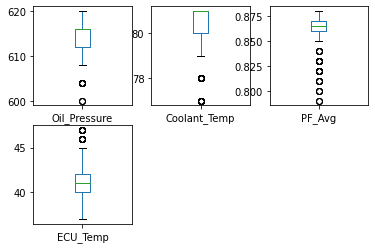

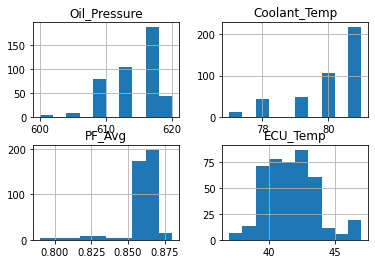

time: 1.04 s (started: 2021-10-07 12:00:13 +00:00)


In [ ]:
#Training dataset 2 Summary (exclude outlier)

# merge labelled data into training dataset
labeled_dataset2 = pd.merge(df_Maintenance, df_Normal, how = 'outer')
print(labeled_dataset2)

#Visualize data
print('Training dataset size excluding outlier : ', labeled_dataset2.shape)
# class distribution
print(labeled_dataset2.groupby('Label').size())
print(' ')
# statistical value of data
print(labeled_dataset2.describe(percentiles=[.25, .4, .5, .6, .75]))
# box and whisker plots
labeled_dataset2.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()
# histograms
labeled_dataset2.hist()
pyplot.show()
#export df to csv
labeled_dataset2.to_csv(process_dir+'labeled_dataset2.csv')

### Filtered data for Regression

In [ ]:
# Pre-processing
print('Total data size : ', df.shape)
df.drop_duplicates()
print('Removed duplicates data size : ', df.shape)

Total data size :  (34357, 6)
Removed duplicates data size :  (34357, 6)
time: 20.2 ms (started: 2021-10-07 12:00:14 +00:00)


In [ ]:
#Filter Outlier data from each feature
Filtered_Oil = df['Oil_Pressure'].between(oil_threshold_25, oil_threshold_75) 
Filtered_Coolant = df['Coolant_Temp'].between(coolant_threshold_25, coolant_threshold_75)
Filtered_ECU = df['ECU_Temp'].between(ecu_threshold_25, ecu_threshold_75) 
Filtered_PFA = df['PF_Avg'].between(pf_threshold_25, pf_threshold_75)

df_Filtered = df[Filtered_Coolant & Filtered_ECU & Filtered_Oil & Filtered_PFA]
df_Filtered

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Train_code
2935,2020-01-04 06:00:00,624.0,82.0,0.89,40.0,P-01801
2936,2020-01-04 07:00:00,620.0,82.0,0.89,43.0,P-01801
2940,2020-01-04 11:00:00,624.0,82.0,0.88,48.0,P-01801
2942,2020-01-04 13:14:00,624.0,82.0,0.87,46.0,P-01801
3021,2020-02-04 08:00:00,616.0,82.0,0.88,46.0,P-01801
...,...,...,...,...,...,...
34333,2020-07-31 19:00:00,604.0,81.0,0.85,40.0,P-01914
34334,2020-07-31 20:00:00,604.0,81.0,0.87,40.0,P-01914
34335,2020-07-31 21:00:00,608.0,81.0,0.87,39.0,P-01914
34336,2020-07-31 22:00:00,604.0,81.0,0.86,37.0,P-01914


time: 28.8 ms (started: 2021-10-07 12:00:14 +00:00)


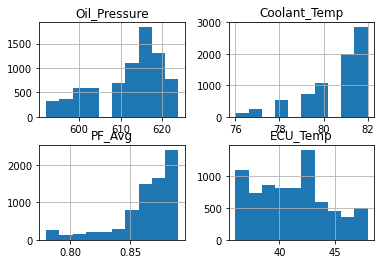

time: 556 ms (started: 2021-10-07 12:00:14 +00:00)


In [ ]:
# visualisasi dalam grafik
df_Filtered.hist()
pyplot.show()

In [ ]:
# Create dataframe ONLY for Maintenance condition
#Stat_Maintenance = 25% < value < 40% or 60% < value < 75%
Maintenance_Oil = (df_Filtered['Oil_Pressure'].between(oil_threshold_25, oil_threshold_40, inclusive=False)) | (df_Filtered['Oil_Pressure'].between(oil_threshold_60, oil_threshold_75, inclusive=False))
Maintenance_Coolant = (df_Filtered['Coolant_Temp'].between(coolant_threshold_25, coolant_threshold_40, inclusive=False)) | (df_Filtered['Coolant_Temp'].between(coolant_threshold_60, coolant_threshold_75, inclusive=False)) 
Maintenance_ECU = (df_Filtered['ECU_Temp'].between(ecu_threshold_25, ecu_threshold_40, inclusive=False)) | (df_Filtered['ECU_Temp'].between(ecu_threshold_60, ecu_threshold_75, inclusive=False))
Maintenance_PFA = (df_Filtered['PF_Avg'].between(pf_threshold_25, pf_threshold_40, inclusive=False)) | (df_Filtered['PF_Avg'].between(pf_threshold_60, pf_threshold_75, inclusive=False))

#When parameter have Stat_Maintenance condition TRUE then it is labelled as Maintenance
df_Maintenance = df_Filtered[Maintenance_Oil | Maintenance_Coolant | Maintenance_ECU | Maintenance_PFA] # OR condition (choose one only)
#df_Maintenance = df_Filtered[Maintenance_Oil & Maintenance_Coolant & Maintenance_ECU & Maintenance_PFA] # AND condition (choose one only)

df_Maintenance.insert(5, 'Label', 'Maintenance', True)
df_Maintenance = df_Maintenance.drop_duplicates(subset='Datetime')
print('Maintenance data size : ', df_Maintenance.shape)
df_Maintenance.head(5)

Maintenance data size :  (4292, 7)


,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Label,Train_code
2936,2020-01-04 07:00:00,620.0,82.0,0.89,43.0,Maintenance,P-01801
2940,2020-01-04 11:00:00,624.0,82.0,0.88,48.0,Maintenance,P-01801
2942,2020-01-04 13:14:00,624.0,82.0,0.87,46.0,Maintenance,P-01801
3021,2020-02-04 08:00:00,616.0,82.0,0.88,46.0,Maintenance,P-01801
3089,2020-03-04 10:00:00,620.0,82.0,0.89,48.0,Maintenance,P-01801


time: 43.1 ms (started: 2021-10-07 12:00:14 +00:00)


In [ ]:
# Dataset for All vehicles 
#calculate diffs from each row

#df_Maintenance['diffs'] = df_Maintenance.sort_values(['Train_code','Datetime']).groupby('Train_code')['Datetime'].diff() #grouped by train code (Choose one)
df_Maintenance = df_Maintenance.sort_values(by='Datetime')                                               #NOT grouped (Choose one)
df_Maintenance['diffs'] = df_Maintenance['Datetime'].diff()                                              #NOT grouped (Choose one)
df_Maintenance['diffs'] = df_Maintenance['diffs'].fillna(pd.Timedelta(seconds=0))
df_Maintenance['Delta_Time_h'] = df_Maintenance.diffs/np.timedelta64(1,'h')
df_Maintenance


,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Label,Train_code,diffs,Delta_Time_h
14136,2020-01-04 00:00:00,624.0,78.0,0.87,37.0,Maintenance,P-01818,0 days 00:00:00,0.000000
14137,2020-01-04 01:00:00,624.0,77.0,0.87,37.0,Maintenance,P-01818,0 days 01:00:00,1.000000
14139,2020-01-04 03:00:00,620.0,78.0,0.89,39.0,Maintenance,P-01818,0 days 02:00:00,2.000000
2936,2020-01-04 07:00:00,620.0,82.0,0.89,43.0,Maintenance,P-01801,0 days 04:00:00,4.000000
20706,2020-01-04 08:00:00,624.0,79.0,0.87,38.0,Maintenance,P-01822,0 days 01:00:00,1.000000
...,...,...,...,...,...,...,...,...,...
17366,2021-12-03 07:02:00,616.0,82.0,0.88,36.0,Maintenance,P-01820,0 days 03:02:00,3.033333
6349,2021-12-03 18:00:00,620.0,80.0,0.84,38.0,Maintenance,P-01808,0 days 10:58:00,10.966667
17380,2021-12-03 21:00:00,612.0,82.0,0.88,41.0,Maintenance,P-01820,0 days 03:00:00,3.000000
17381,2021-12-03 22:00:00,616.0,82.0,0.85,38.0,Maintenance,P-01820,0 days 01:00:00,1.000000


time: 32.6 ms (started: 2021-10-07 12:00:14 +00:00)


Train_code
P-01801    1.256061
P-01808    2.438431
P-01811    1.313102
P-01812    1.476762
P-01818    8.848509
P-01820    2.808978
P-01821    5.535510
P-01822    2.266574
P-01823    3.446022
P-01825    1.191146
P-01903    2.617284
P-01908    7.365023
P-01914    3.210440
Name: Delta_Time_h, dtype: float64


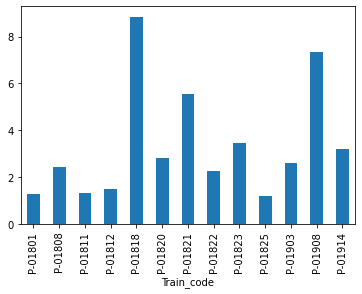

time: 266 ms (started: 2021-10-07 12:00:14 +00:00)


In [ ]:
# Visualize MTBF
print(df_Maintenance.groupby('Train_code').Delta_Time_h.mean())
df_Maintenance.groupby('Train_code').Delta_Time_h.mean().plot(kind='bar')


In [ ]:
#Export Dataset for All vehicles grouped by train code
df_Maintenance.to_csv(process_dir+'all_vehicles.csv')

time: 118 ms (started: 2021-10-07 12:00:15 +00:00)
